#  Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# DATA

In [7]:
df = pd.read_csv(r"D:\house\notebooks\Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# EDA

In [8]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
df.shape

(545, 13)

In [13]:
print(df.nunique())

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64


In [14]:
df.isnull().sum() 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

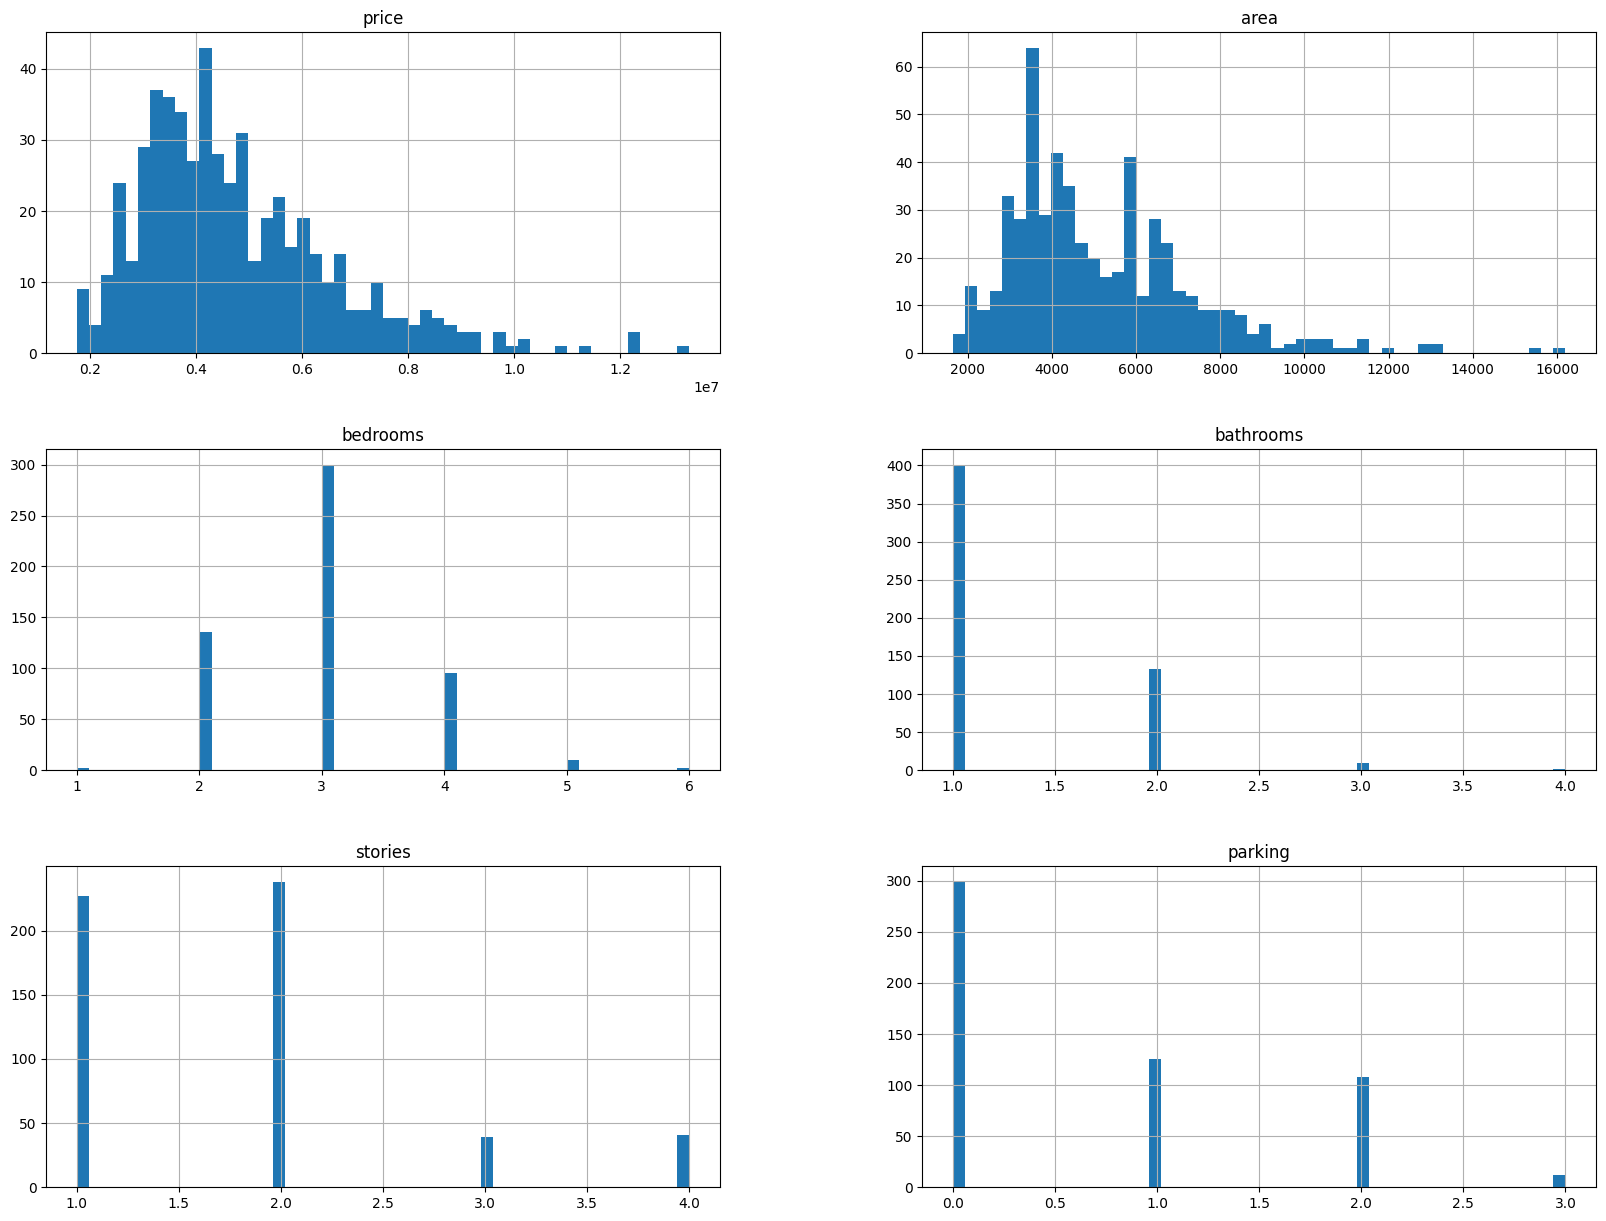

In [15]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

# Categorical Data Distribution

In [16]:
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

#  Correlation Analysis

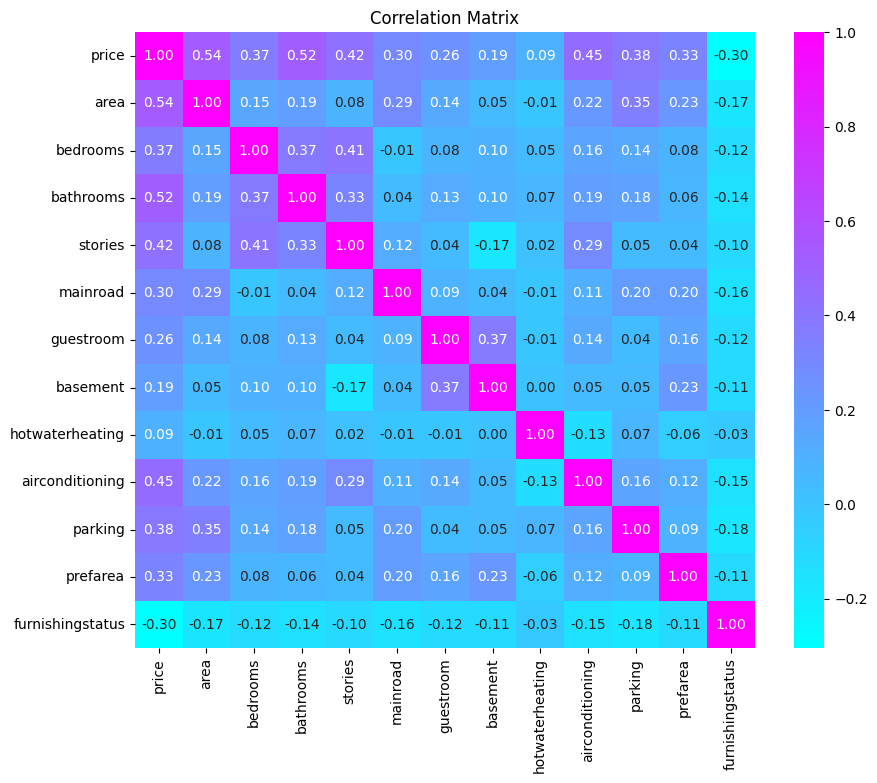

In [27]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cool', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

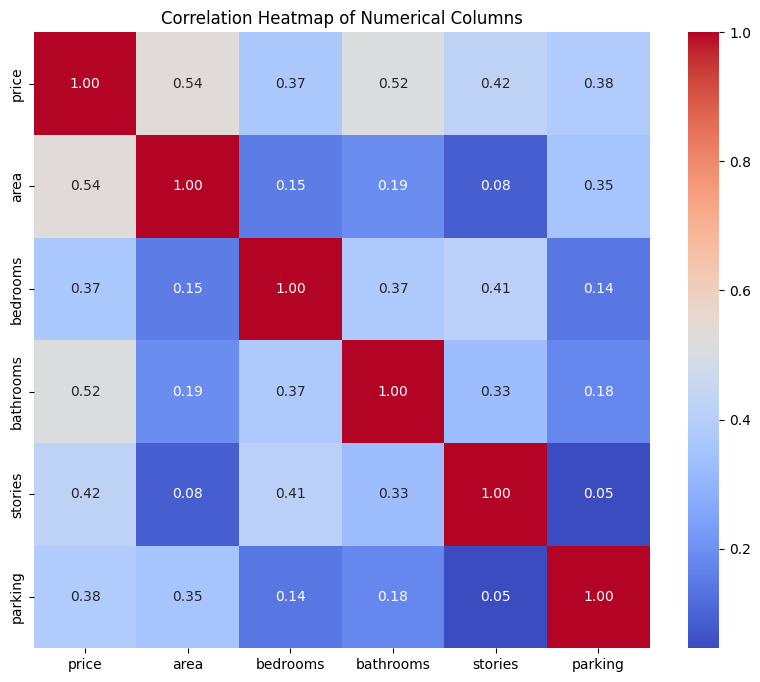

In [29]:
numerical_cols = []
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        numerical_cols.append(col)

numerical_df = df[numerical_cols]

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [30]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,1.069725
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.761373
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


# Data Splitting

In [31]:
x = df.drop(['price'], axis=1)
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# StandardScaler

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# XGBRegressor  Model Training and Evaluation

In [35]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
xgboost_model = xgb.XGBRegressor()

xgboost_model.fit(X_train, y_train)

y_pred_xgboost = xgboost_model.predict(X_test)

mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
rmse_xgboost = np.sqrt(mse_xgboost)

print("XGBoost Regressor:")
print(f"Mean Squared Error (MSE): {mse_xgboost:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgboost:.2f}")
r2 = r2_score(y_test, y_pred_xgboost)
print(f"R-squared (R2) score: {r2:.2f}")


XGBoost Regressor:
Mean Squared Error (MSE): 2032404618961.44
Root Mean Squared Error (RMSE): 1425624.29
R-squared (R2) score: 0.60


#  RandomForestRegressor

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [37]:
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_train, y_train)
y_pred_random_forest = random_forest_regressor.predict(X_test)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
rmse_random_forest = np.sqrt(mse_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {mse_random_forest:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_random_forest:.2f}")
print(f"R-squared (R2): {r2_random_forest:.2f}")


Random Forest Regressor:
Mean Squared Error (MSE): 1879784035025.09
Root Mean Squared Error (RMSE): 1371052.16
R-squared (R2): 0.63


# DecisionTreeRegressor

In [38]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_regressor.predict(X_test)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rmse_decision_tree = np.sqrt(mse_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {mse_decision_tree:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_decision_tree:.2f}")
print(f"R-squared (R2): {r2_decision_tree:.2f}")


Decision Tree Regressor:
Mean Squared Error (MSE): 3199350594036.70
Root Mean Squared Error (RMSE): 1788672.86
R-squared (R2): 0.37


# LinearRegression

In [39]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_linear = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_linear:.2f}")
print(f"R-squared (R2): {r2_linear:.2f}")


Linear Regression:
Mean Squared Error (MSE): 1771751116594.04
Root Mean Squared Error (RMSE): 1331071.42
R-squared (R2): 0.65
